<a href="https://colab.research.google.com/github/deepak-kannan7/Restaurant-Review-Classifier-NLP/blob/main/SentimentAnalysisNLPModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("RestaurantReviews.tsv", delimiter='\t', quoting=3)

In [3]:
df.shape

(900, 2)

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
#Data Cleaning

import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
review_data=[]

for i in range(0, 900):
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i]) #Dropping all special characters and numbers
  review = review.lower() 
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)] #Dropping all stop words
  review = ' '.join(review)
  review_data.append(review)

In [7]:
review_data

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

In [8]:
#Data Transformation

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 501)

#I picked the number 501 by using trail and error method.
#I tried increasing and decreasing the max_features values and saw the accuracy for each number. 
#The max accuracy was 75.555% at 501.

In [9]:
X = cv.fit_transform(review_data).toarray()
y = df.iloc[:, -1].values

In [10]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = 'BagofWords.pkl'
pickle.dump(cv, open(bow_path, "wb"))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [12]:
#Model Fitting using Naive Bayes

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [13]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'NB_Classifier') 

['NB_Classifier']

In [14]:
#Performance of our model

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

accuracy_score(y_test, y_pred)

Confusion Matrix: 
[[64 14]
 [30 72]]


0.7555555555555555

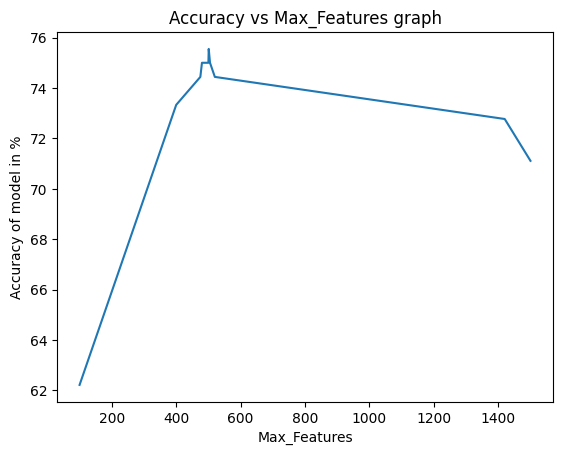

In [15]:
#Accuracy vs max_features graph:

import matplotlib.pyplot as plt
x=[100,400,475,480,500,501,505,520,1420,1500]
y=[62.22,73.33,74.44,75,75,75.55,75,74.44,72.77,71.11]
plt.plot(x,y)
plt.xlabel('Max_Features')
plt.ylabel('Accuracy of model in %')
plt.title('Accuracy vs Max_Features graph')
plt.show()